# Mec-5.3.10

# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.3.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [13]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [14]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [20]:
harry_potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harry_potter_df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [21]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [22]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [31]:
start_year = 2000
end_year = 2018
l = len(movies[(movies.year >= start_year) & (movies.year <= end_year)])
print(f'\n There were {l} movies made from {start_year} through {end_year} (inclusive).\n')


 There were 114070 movies made from 2000 through 2018 (inclusive).



### Section I - Q4: How many movies are titled "Hamlet"?

In [34]:
hamlet_df = movies[movies.title == 'Hamlet']
print(f'There are a total of {len(hamlet_df)} movies titled "Hamlet"')

         title  year
1931    Hamlet  2009
8214    Hamlet  1976
46344   Hamlet  1921
55639   Hamlet  2000
73869   Hamlet  1948
98326   Hamlet  1990
118535  Hamlet  1913
124506  Hamlet  1911
140203  Hamlet  1954
155004  Hamlet  1964
There are a total of 20 movies titled "Hamlet"


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [37]:
hamlet_since_2000_df = hamlet_df[hamlet_df["year"] >= 2000]
print('All films titled "Hamlet" released from 2000 to present, oldest to most recent:\n')
hamlet_since_2000_df.sort_values(by=['year'], ascending=True)

All films titled "Hamlet" released from 2000 to present, oldest to most recent:



,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [42]:
movie_title = "Inception"
movie_cast_df = cast[cast["title"] == movie_title]
supporting_cast_df = movie_cast_df[movie_cast_df["n"].isna()]
print(f'\n The movie {movie_title} has {len(supporting_cast_df)} supporting cast members.\n') 


 The movie Inception has 27 supporting cast members.



### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [43]:
main_cast_df = movie_cast_df[movie_cast_df["n"].notna()]
print(f'\n The movie {movie_title} has {len(main_cast_df)} main cast members.\n') 


 The movie Inception has 51 main cast members.



### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [45]:
main_cast_df.sort_values(by=['n'], ascending=True).iloc[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [48]:
albus_dumbledore_df = cast[cast["character"] == "Albus Dumbledore"]

In [52]:
dumbledore_actors = albus_dumbledore_df["name"].unique()
print(f'\n The actors who have portrayed Albus Dumbledore are:\n')
l = [print(actor) for actor in list(dumbledore_actors)]


 The actors who have portrayed Albus Dumbledore are:

Dane Farwell
Michael Gambon
Richard Harris
George (X) O'Connor
Timothy Tedmanson


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [56]:
actor_name = 'Keanu Reeves'
actor_roles_df = cast[cast["name"] == actor_name]
print(actor_roles_df)
print(f'\n {actor_name} has played {len(actor_roles_df)} roles.')

                                    title  year          name   type  \
1892342                          47 Ronin  2013  Keanu Reeves  actor   
1892343                  A Scanner Darkly  2006  Keanu Reeves  actor   
1892344              A Walk in the Clouds  1995  Keanu Reeves  actor   
1892345        Bill & Ted's Bogus Journey  1991  Keanu Reeves  actor   
1892346  Bill & Ted's Excellent Adventure  1989  Keanu Reeves  actor   
...                                   ...   ...           ...    ...   
1892399                   The Whole Truth  2016  Keanu Reeves  actor   
1892400                       Thumbsucker  2005  Keanu Reeves  actor   
1892401                       To the Bone  2017  Keanu Reeves  actor   
1892402               Tune in Tomorrow...  1990  Keanu Reeves  actor   
1892403                        Youngblood  1986  Keanu Reeves  actor   

             character     n  
1892342            Kai   1.0  
1892343     Bob Arctor   4.0  
1892344    Paul Sutton   1.0  
1892345    

In [65]:
leading_actor_roles_post_1999_df = actor_roles_df[(actor_roles_df["n"] == 1) &\
                                                  (actor_roles_df["year"] >= 1999)]
print(f'\n {actor_name} has played {len(leading_actor_roles_post_1999_df)} leading roles since 1999.\
 From oldest to most recent they are as follows:')
leading_actor_roles_post_1999_df.sort_values(by=['year'], ascending=True)


 Keanu Reeves has played 15 leading roles since 1999. From oldest to most recent they are as follows:


,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [72]:
role_types = ['actor', 'actress']
start_year = 1950
end_year = 1960

for role_type in role_types:
    roles_in_interval = cast[(cast["type"] == role_type) &
                               (cast["year"] >= start_year) &
                               (cast["year"] <= end_year)]
    print(f'\n Between {start_year} and {end_year} there were {len(roles_in_interval)} {role_type} roles available\n')


 Between 1950 and 1960 there were 171302 actor roles available


 Between 1950 and 1960 there were 63333 actress roles available



In [73]:
start_year = 2007
end_year = 2017
for role_type in role_types:
    roles_in_interval = cast[(cast["type"] == role_type) &
                               (cast["year"] >= start_year) &
                               (cast["year"] <= end_year)]
    print(f'\n Between {start_year} and {end_year} there were {len(roles_in_interval)} {role_type} roles available\n')


 Between 2007 and 2017 there were 922782 actor roles available


 Between 2007 and 2017 there were 529631 actress roles available



### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [74]:
start_year = 2000
leading_roles = cast[(cast["n"] == 1) & (cast["year"] >= start_year)]
print(f'\n There were {len(leading_roles)} leading roles from {start_year} to present')


 There were 60568 leading roles from 2000 to present


In [77]:
non_leading_roles_exclude_support = cast[(cast["n"] > 1) & (cast["year"] >= start_year)]
print(f'\n There were {len(non_leading_roles_exclude_support)} non-leading roles (excluding supporting roles) from {start_year} to present')


 There were 1001710 non-leading roles (excluding supporting roles) from 2000 to present


In [78]:
support_roles_exclude_support = cast[(cast["n"].isna()) & (cast["year"] >= start_year)]
print(f'\n There were {len(support_roles_exclude_support)} supporting roles from {start_year} to present')


 There were 887484 supporting roles from 2000 to present


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [82]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

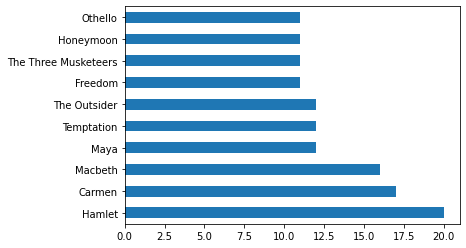

In [83]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [89]:
movies[(movies["year"] >= 2000) & (movies["year"] <= 2009)].year.value_counts()[:3]

2009    6125
2008    5151
2007    4467
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:title={'center':'Movie counts by decade'}>

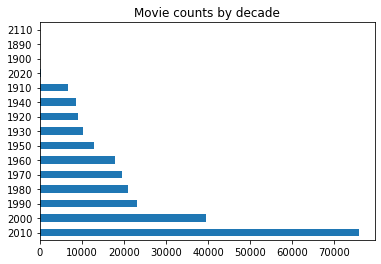

In [125]:
movie_decade = pd.Series(10*(movies["year"] // 10), name="decade") 
movie_decade
movie2 = pd.concat([movies, movie_decade], axis=1)
movie_counts_by_deacde = movie2.sort_values(by=['year'], ascending=False).decade.value_counts()
movie_counts_by_deacde.plot(kind='barh', title='Movie counts by decade')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [130]:
cast.character.value_counts()[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [133]:
cast[cast["character"] == 'Herself'].name.value_counts()[:10]

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

In [134]:
cast[cast["character"] == 'Himself'].name.value_counts()[:10]

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [149]:
starts_with = "Zombie"
cast[cast["character"].str.startswith(starts_with)].character.value_counts()[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [151]:
starts_with = "Police "
cast[cast["character"].str.startswith(starts_with)].character.value_counts()[:10]

Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police Chief            410
Police Captain          387
Police Commissioner     337
Police Detective        327
Police Officer #1       270
Police Officer #2       248
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:title={'center':'Keanu Reeves Movie Roles by Year'}>

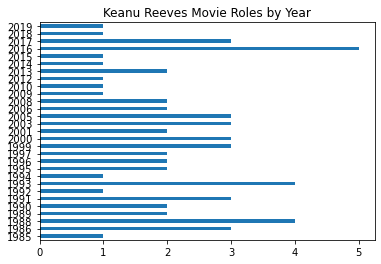

In [173]:
actor_name = 'Keanu Reeves'
s = cast[cast['name'] == actor_name]\
.sort_values(by=['year'])\
.year\
.value_counts()\
.sort_index()

s.plot(kind='barh', title='Keanu Reeves Movie Roles by Year')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:title={'center':'Keanu Reeves cast positions (lower n -> higher importance)'}, xlabel='year', ylabel='n'>

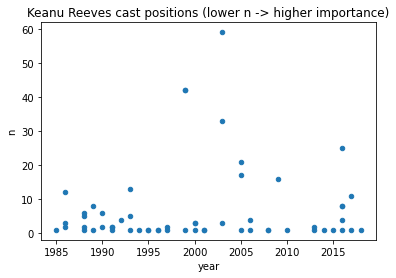

In [191]:
actor_name = 'Keanu Reeves'
cast_positions = cast[cast['name'] == actor_name]\
.sort_values(by=['year'])[['year', 'n']].dropna()

cast_positions.plot.scatter(x='year', y='n', title='Keanu Reeves cast positions (lower n -> higher importance)')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:title={'center':'Count by Decade of Hamlet films made'}>

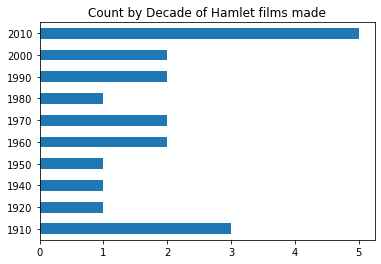

In [209]:
title = "Hamlet"
movie2 = pd.concat([movies, movie_decade], axis=1)

movie_title_by_decade = movie2[movie2["title"] == title]\
.sort_values(by=['year'])\
.decade\
.value_counts()\
.sort_index()

movie_title_by_decade.plot(kind='barh', title=f'Count by Decade of {title} films made')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [214]:
start_year = 1960
end_year = 1969
leading_roles = cast[(cast['n'] == 1) & (cast['year'] >= start_year) & (cast['year'] <= end_year)]
leading_roles_actress = leading_roles[leading_roles["type"] == 'actress']
leading_roles_actor = leading_roles[leading_roles["type"] == 'actor']
print(f'\n There were {len(leading_roles_actress)} leading roles for actresses\
 between {start_year} and {end_year}\n')

print(f'\n There were {len(leading_roles_actor)} leading roles for actresses\
 between {start_year} and {end_year}\n')



 There were 3503 leading roles for actresses between 1960 and 1969


 There were 8320 leading roles for actresses between 1960 and 1969



In [215]:
start_year = 2000
end_year = 2009
leading_roles = cast[(cast['n'] == 1) & (cast['year'] >= start_year) & (cast['year'] <= end_year)]
leading_roles_actress = leading_roles[leading_roles["type"] == 'actress']
leading_roles_actor = leading_roles[leading_roles["type"] == 'actor']
print(f'\n There were {len(leading_roles_actress)} leading roles for actresses\
 between {start_year} and {end_year}\n')

print(f'\n There were {len(leading_roles_actor)} leading roles for actresses\
 between {start_year} and {end_year}\n')


 There were 7787 leading roles for actresses between 2000 and 2009


 There were 18557 leading roles for actresses between 2000 and 2009



### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [318]:
df1 = cast[cast["name"] == 'Frank Oz']\
.sort_values(by=['year'])
df1

,title,year,name,type,character,n
1723645,The Muppet Movie,1979,Frank Oz,actor,Miss Piggy,2.0
1723652,The Muppet Movie,1979,Frank Oz,actor,Motorcycle Guy,2.0
1723651,The Muppet Movie,1979,Frank Oz,actor,Swedish Chef (assistant),2.0
1723650,The Muppet Movie,1979,Frank Oz,actor,Marvin Suggs,2.0
1723649,The Muppet Movie,1979,Frank Oz,actor,Doc Hopper's Men,2.0
...,...,...,...,...,...,...
1723661,Zathura: A Space Adventure,2005,Frank Oz,actor,Robot,6.0
1723616,Sesame Street: C is for Cookie Monster,2010,Frank Oz,actor,Cookie Monster,NaN
1723605,Inside Out,2015,Frank Oz,actor,Subconscious Guard Dave,14.0
1723631,The Great Gilly Hopkins,2015,Frank Oz,actor,Cookie Monster,20.0


In [321]:
s1 = df1.title.value_counts(sort=False)
s2 = s1[s1 > 1]
s2

The Muppet Movie                        8
The Great Muppet Caper                  6
An American Werewolf in London          2
The Dark Crystal                        2
The Muppets Take Manhattan              7
Follow That Bird                        3
The Muppet Christmas Carol              7
Muppet Treasure Island                  4
Muppets from Space                      4
The Adventures of Elmo in Grouchland    3
Name: title, dtype: int64

In [322]:
names = ['Frank Oz']
dfc = cast.query(f"title in {list(s2.index)} and name in {names}")
dfc

,title,year,name,type,character,n
1723598,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0
1723601,Follow That Bird,1985,Frank Oz,actor,Cookie Monster,3.0
1723602,Follow That Bird,1985,Frank Oz,actor,Bert,3.0
1723603,Follow That Bird,1985,Frank Oz,actor,Grover,3.0
1723608,Muppet Treasure Island,1996,Frank Oz,actor,Miss Piggy,14.0
1723609,Muppet Treasure Island,1996,Frank Oz,actor,Fozzie Bear,14.0
1723610,Muppet Treasure Island,1996,Frank Oz,actor,Sam the Eagle,14.0
1723611,Muppet Treasure Island,1996,Frank Oz,actor,Animal,14.0
1723612,Muppets from Space,1999,Frank Oz,actor,Miss Piggy,7.0


In [323]:
dfc1 = dfc.sort_values(by=['year', 'title'])
dfc1

,title,year,name,type,character,n
1723645,The Muppet Movie,1979,Frank Oz,actor,Miss Piggy,2.0
1723646,The Muppet Movie,1979,Frank Oz,actor,Fozzie Bear,2.0
1723647,The Muppet Movie,1979,Frank Oz,actor,Animal,2.0
1723648,The Muppet Movie,1979,Frank Oz,actor,Sam the Eagle,2.0
1723649,The Muppet Movie,1979,Frank Oz,actor,Doc Hopper's Men,2.0
1723650,The Muppet Movie,1979,Frank Oz,actor,Marvin Suggs,2.0
1723651,The Muppet Movie,1979,Frank Oz,actor,Swedish Chef (assistant),2.0
1723652,The Muppet Movie,1979,Frank Oz,actor,Motorcycle Guy,2.0
1723598,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0


In [324]:
dfc2 = dfc1.groupby(by='title').min().sort_values(by=['year'])
dfc2

,year,name,type,character,n
title,,,,,
The Muppet Movie,1979,Frank Oz,actor,Animal,2.0
An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0
The Great Muppet Caper,1981,Frank Oz,actor,Animal,2.0
The Dark Crystal,1982,Frank Oz,actor,"Aughra, a Keeper Of Secrets (performer)",3.0
The Muppets Take Manhattan,1984,Frank Oz,actor,Animal,2.0
Follow That Bird,1985,Frank Oz,actor,Bert,3.0
The Muppet Christmas Carol,1992,Frank Oz,actor,Animal,5.0
Muppet Treasure Island,1996,Frank Oz,actor,Animal,14.0
Muppets from Space,1999,Frank Oz,actor,Animal,7.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [326]:
df = cast[cast['name'] == 'Frank Oz']
df

,title,year,name,type,character,n
1723598,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0
1723600,Blues Brothers 2000,1998,Frank Oz,actor,Warden,4.0
1723601,Follow That Bird,1985,Frank Oz,actor,Cookie Monster,3.0
1723602,Follow That Bird,1985,Frank Oz,actor,Bert,3.0
...,...,...,...,...,...,...
1723657,The Muppets Take Manhattan,1984,Frank Oz,actor,Cookie Monster,2.0
1723658,The Muppets Take Manhattan,1984,Frank Oz,actor,Ocean Breeze Soap Board Member,2.0
1723659,The Muppets Take Manhattan,1984,Frank Oz,actor,Sam the Eagle,2.0
1723660,Trading Places,1983,Frank Oz,actor,Corrupt Cop,46.0


In [327]:
s1 = df.character.value_counts()
s1

Miss Piggy                                              6
Yoda                                                    6
Animal                                                  6
Cookie Monster                                          5
Sam the Eagle                                           5
Fozzie Bear                                             4
Bert                                                    3
Grover                                                  2
Marvin Suggs                                            1
George the Janitor                                      1
Horse and Carriage Driver                               1
Vegetable Salesman                                      1
Doc Hopper's Men                                        1
Mr. Collins                                             1
Fozzie Bear as Fozziewig                                1
Swedish Chef (assistant)                                1
Motorcycle Guy                                          1
Fozzie        

In [328]:
s2 = s1[s1 > 1]
s2

Miss Piggy        6
Yoda              6
Animal            6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
Name: character, dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

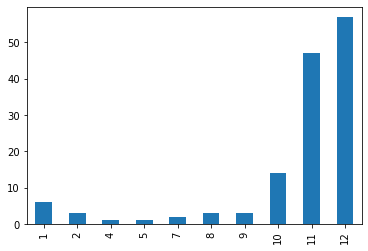

In [329]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

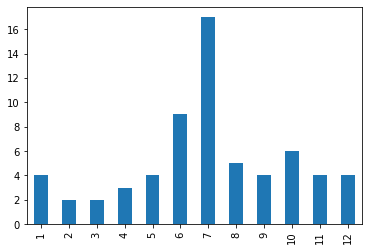

In [330]:
summer_in_title = release_dates[(release_dates.title.str.contains('Summer')) &\
                                (release_dates.country == 'USA')]
summer_in_title.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

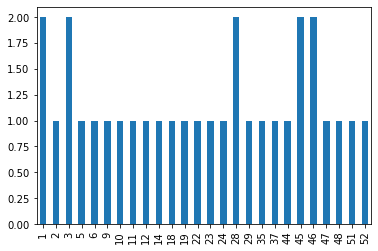

In [332]:
action_in_title = release_dates[(release_dates.title.str.contains('Action')) &\
                                (release_dates.country == 'USA')]
action_in_title.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [333]:
actor_name = 'Keanu Reeves'
actor_roles_df = cast[cast["name"] == actor_name]
actor_roles_df

,title,year,name,type,character,n
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892343,A Scanner Darkly,2006,Keanu Reeves,actor,Bob Arctor,4.0
1892344,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0
1892345,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0
1892346,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0
...,...,...,...,...,...,...
1892399,The Whole Truth,2016,Keanu Reeves,actor,Ramsey,1.0
1892400,Thumbsucker,2005,Keanu Reeves,actor,Perry Lyman,17.0
1892401,To the Bone,2017,Keanu Reeves,actor,Dr. Beckham,11.0
1892402,Tune in Tomorrow...,1990,Keanu Reeves,actor,Martin Loader,2.0


In [341]:
actor_leading_roles_df = actor_roles_df[actor_roles_df["n"] == 1].sort_values(by=['year'])
actor_leading_roles_df

,title,year,name,type,character,n
1892373,One Step Away,1985,Keanu Reeves,actor,Ron Petrie,1.0
1892394,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0
1892346,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0
1892345,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0
1892367,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0
1892380,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0
1892344,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0
1892364,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0
1892347,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0
1892354,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0


In [342]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [346]:
# Note: The release_dates data source does not include some data found in the cast data source
# 'The Whole Truth' USA release info appears to be missing from release_dates.
# The film titled 'Siberia' released around 2018 is not in release_dates; the only
# film by that title in that db was released about 2 decades prior.
# Similarly, 'One Step Away' and "Henry's Crime" have no USA release info in release_dates.
# See results below.
dfm = pd.merge(actor_leading_roles_df, release_dates[(release_dates['country'] == 'USA')\
                                                     & (release_dates['date'].dt.year > 1984)],\
               how='inner',on='title')
dfm.sort_values(by=['date'])

,title,year_x,name,type,character,n,year_y,country,date
0,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,1988,USA,1988-04-15
1,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,1989,USA,1989-02-17
2,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,1991,USA,1991-07-19
3,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,1993,USA,1994-05-25
4,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,1994,USA,1994-06-10
6,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,1995,USA,1995-05-26
5,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,1995,USA,1995-08-11
7,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,1996,USA,1996-08-02
8,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,1996,USA,1996-09-13
9,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,1997,USA,1997-10-17


In [349]:
release_dates[release_dates['title'] == 'Siberia']

,title,year,country,date
330070,Siberia,1998,Netherlands,1998-08-27
330071,Siberia,1998,Japan,1999-08-14
330072,Siberia,1998,UK,2000-08-18
330073,Siberia,1998,Canada,2001-03-16


In [350]:
release_dates[release_dates['title'] == 'The Whole Truth']

,title,year,country,date
429078,The Whole Truth,1958,Finland,1958-09-19
429079,The Whole Truth,1958,Sweden,1958-10-13
429080,The Whole Truth,1958,West Germany,1958-11-07
429081,The Whole Truth,1958,Mexico,1959-01-15
429082,The Whole Truth,1958,Denmark,1963-08-05
429083,The Whole Truth,2016,Japan,2016-03-25
429084,The Whole Truth,2016,Ireland,2016-06-10
429085,The Whole Truth,2016,Mexico,2016-08-05
429086,The Whole Truth,2016,Turkey,2016-08-19
429087,The Whole Truth,2016,Greece,2016-08-25


In [352]:
# One Step Away
release_dates[release_dates['title'] == 'One Step Away']

,title,year,country,date
273851,One Step Away,1985,Canada,1985-09-13
273852,One Step Away,2014,China,2014-09-19


In [353]:
# Henry's Crime
release_dates[release_dates['title'] == "Henry's Crime"]

,title,year,country,date
153881,Henry's Crime,2010,UK,2011-01-14
153882,Henry's Crime,2010,Belarus,2011-04-07
153883,Henry's Crime,2010,Kazakhstan,2011-04-07
153884,Henry's Crime,2010,Russia,2011-04-07
153885,Henry's Crime,2010,Ukraine,2011-04-07
153886,Henry's Crime,2010,Netherlands,2011-04-21
153887,Henry's Crime,2010,Turkey,2011-05-06
153888,Henry's Crime,2010,Armenia,2011-05-14
153889,Henry's Crime,2010,United Arab Emirates,2011-05-26
153890,Henry's Crime,2010,Malaysia,2011-06-09


In [351]:
# To include all of Keanu Reeves' lead roles including those w/o a matching
# USA release in release_dates, we need a left join rather than an inner join in the merge() call
dfm2 = pd.merge(actor_leading_roles_df, release_dates[(release_dates['country'] == 'USA')\
                                                     & (release_dates['date'].dt.year > 1984)],\
               how='left',on='title')
dfm2.sort_values(by=['date'])

,title,year_x,name,type,character,n,year_y,country,date
1,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,1988.0,USA,1988-04-15
2,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,1989.0,USA,1989-02-17
3,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,1991.0,USA,1991-07-19
4,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,1993.0,USA,1994-05-25
5,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,1994.0,USA,1994-06-10
7,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,1995.0,USA,1995-05-26
6,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,1995.0,USA,1995-08-11
8,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,1996.0,USA,1996-08-02
9,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,1996.0,USA,1996-09-13
10,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,1997.0,USA,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA.

In [354]:
actor_name = 'Keanu Reeves'
actor_roles_df = cast[cast["name"] == actor_name]
actor_roles_df

,title,year,name,type,character,n
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892343,A Scanner Darkly,2006,Keanu Reeves,actor,Bob Arctor,4.0
1892344,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0
1892345,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0
1892346,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0
...,...,...,...,...,...,...
1892399,The Whole Truth,2016,Keanu Reeves,actor,Ramsey,1.0
1892400,Thumbsucker,2005,Keanu Reeves,actor,Perry Lyman,17.0
1892401,To the Bone,2017,Keanu Reeves,actor,Dr. Beckham,11.0
1892402,Tune in Tomorrow...,1990,Keanu Reeves,actor,Martin Loader,2.0


In [356]:
dfm = pd.merge(actor_roles_df, release_dates[(release_dates['country'] == 'USA')\
                                                     & (release_dates['date'].dt.year > 1984)],\
               how='inner',on='title')
dfm['month'] = dfm.date.dt.month
dfm

,title,year_x,name,type,character,n,year_y,country,date,month
0,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0,2013,USA,2013-12-25,12
1,A Scanner Darkly,2006,Keanu Reeves,actor,Bob Arctor,4.0,2006,USA,2006-07-28,7
2,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,1995,USA,1995-08-11,8
3,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,1991,USA,1991-07-19,7
4,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,1989,USA,1989-02-17,2
5,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,1996,USA,1996-08-02,8
6,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0,2005,USA,2005-02-18,2
7,Dangerous Liaisons,1988,Keanu Reeves,actor,Chevalier Danceny,5.0,1988,USA,1989-02-24,2
8,Dracula,1992,Keanu Reeves,actor,Jonathan Harker,4.0,1992,USA,1992-11-13,11
9,Even Cowgirls Get the Blues,1993,Keanu Reeves,actor,Julian Gitche,5.0,1993,USA,1994-05-20,5


In [361]:
s = dfm.month.value_counts().sort_index()
s

1     3
2     5
3     1
4     6
5     7
6     5
7     4
8     3
9     4
10    5
11    3
12    4
Name: month, dtype: int64

<AxesSubplot:>

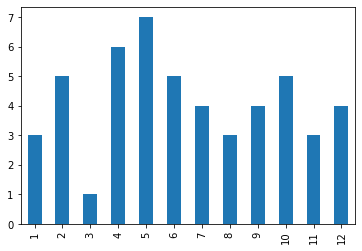

In [368]:
s.plot(kind='bar')

In [374]:

import datetime

months = [x + 1 for x in range(12)]
month_map = {month_num: datetime.datetime.strptime(str(month_num), "%m")\
               .strftime("%b") for month_num in months}
month_map

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [376]:
df = pd.DataFrame({'month_name':month_map.values()}, index = month_map.keys())
df

,month_name
1,Jan
2,Feb
3,Mar
4,Apr
5,May
6,Jun
7,Jul
8,Aug
9,Sep
10,Oct


In [377]:
dff = pd.concat([s, df], axis= 1)
dff

,month,month_name
1,3,Jan
2,5,Feb
3,1,Mar
4,6,Apr
5,7,May
6,5,Jun
7,4,Jul
8,3,Aug
9,4,Sep
10,5,Oct


<AxesSubplot:title={'center':'Release Month of Keanu Reeves Movies'}, xlabel='month_name'>

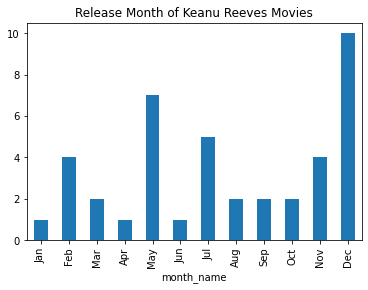

In [387]:
dff.plot.bar(x='month_name', y='month', legend=None, title = 'Release Month of Keanu Reeves Movies')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA.

In [380]:
actor_name = 'Ian McKellen'
actor_roles_df = cast[cast["name"] == actor_name]
actor_roles_df

,title,year,name,type,character,n
1498651,A Touch of Love,1969,Ian McKellen,actor,George,2.0
1498652,Alfred the Great,1969,Ian McKellen,actor,Roger,5.0
1498653,Animal Crackers,2017,Ian McKellen,actor,Horatio P. Huntington,4.0
1498654,Apt Pupil,1998,Ian McKellen,actor,Kurt Dussander,2.0
1498655,Asylum,2005,Ian McKellen,actor,Dr. Peter Cleave,4.0
1498656,Beauty and the Beast,2017,Ian McKellen,actor,Cogsworth,11.0
1498657,Bent,1997,Ian McKellen,actor,Uncle Freddie,12.0
1498658,Doogal,2006,Ian McKellen,actor,Zebedee,9.0
1498659,Eighteen,2005,Ian McKellen,actor,Jason Anders,9.0
1498660,Emile,2003,Ian McKellen,actor,Emile,1.0


In [381]:
dfm = pd.merge(actor_roles_df, release_dates[(release_dates['country'] == 'USA')\
                                                     & (release_dates['date'].dt.year > 1984)],\
               how='inner',on='title')
dfm['month'] = dfm.date.dt.month
dfm

,title,year_x,name,type,character,n,year_y,country,date,month
0,Animal Crackers,2017,Ian McKellen,actor,Horatio P. Huntington,4.0,2017,USA,2018-05-04,5
1,Apt Pupil,1998,Ian McKellen,actor,Kurt Dussander,2.0,1998,USA,1998-10-23,10
2,Asylum,2005,Ian McKellen,actor,Dr. Peter Cleave,4.0,2007,USA,2007-09-16,9
3,Beauty and the Beast,2017,Ian McKellen,actor,Cogsworth,11.0,1991,USA,1991-11-22,11
4,Beauty and the Beast,2017,Ian McKellen,actor,Cogsworth,11.0,2017,USA,2017-03-17,3
5,Bent,1997,Ian McKellen,actor,Uncle Freddie,12.0,1997,USA,1997-11-26,11
6,Doogal,2006,Ian McKellen,actor,Zebedee,9.0,2006,USA,2006-02-24,2
7,Flushed Away,2006,Ian McKellen,actor,The Toad,3.0,2006,USA,2006-11-03,11
8,Gods and Monsters,1998,Ian McKellen,actor,James Whale,1.0,1998,USA,1998-11-04,11
9,I'll Do Anything,1994,Ian McKellen,actor,John Earl McAlpine,11.0,1994,USA,1994-02-04,2


In [382]:
s = dfm.month.value_counts().sort_index()
s

1      1
2      4
3      2
4      1
5      7
6      1
7      5
8      2
9      2
10     2
11     4
12    10
Name: month, dtype: int64

<AxesSubplot:>

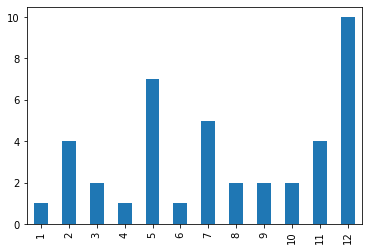

In [383]:
s.plot(kind='bar')

In [384]:
dff = pd.concat([s, df], axis= 1)
dff

,month,month_name
1,1,Jan
2,4,Feb
3,2,Mar
4,1,Apr
5,7,May
6,1,Jun
7,5,Jul
8,2,Aug
9,2,Sep
10,2,Oct


<AxesSubplot:title={'center':'Release Month of Ian McKellen Movies'}, xlabel='month_name'>

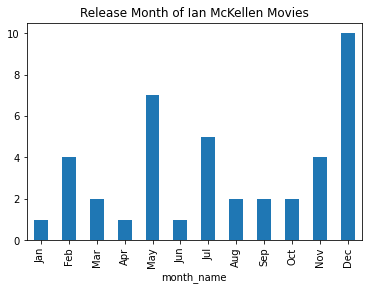

In [388]:
dff.plot.bar(x='month_name', y='month', legend=None , title = 'Release Month of Ian McKellen Movies')